In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math

# 1. Для изображения sar_3.jpg найти наиболее протяженный участок (выделить линии при помощи преобразования Хафа)

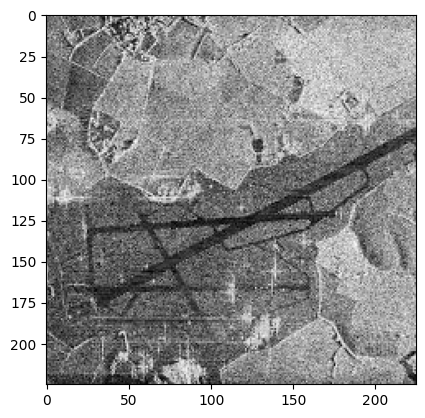

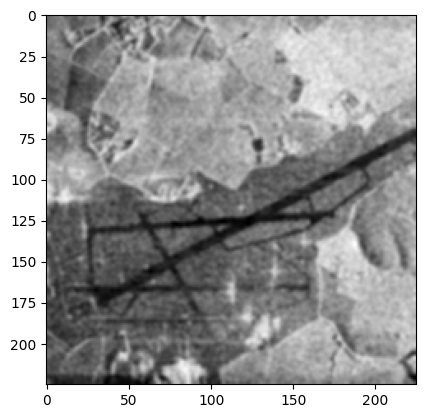

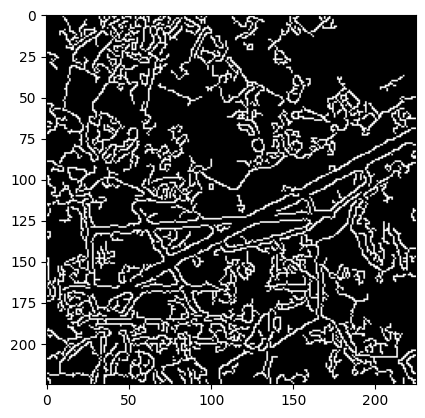

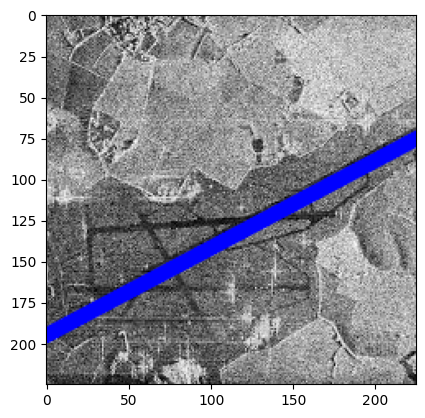

In [7]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()

image_blur = cv2.GaussianBlur(image_gray, (5,5), 0)
plt.imshow(image_blur, cmap='gray')
plt.show()

canny = cv2.Canny(image_blur,50,150,apertureSize = 3)

plt.imshow(canny, cmap = 'gray')
plt.show()

lines = cv2.HoughLines(canny, 1, np.pi / 180, 120)

if lines is not None:
    linee = None
    max_length = 0
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        if length > max_length:
            max_length = length
            linee = (pt1, pt2)
    if linee:
        cv2.line(image, linee[0], linee[1], (0, 0, 255), 7, cv2.LINE_AA)

plt.imshow(image)
plt.show()

# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

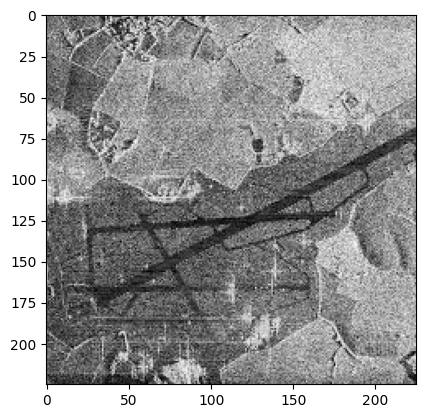

In [8]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.show()

### Точечная бинаризация

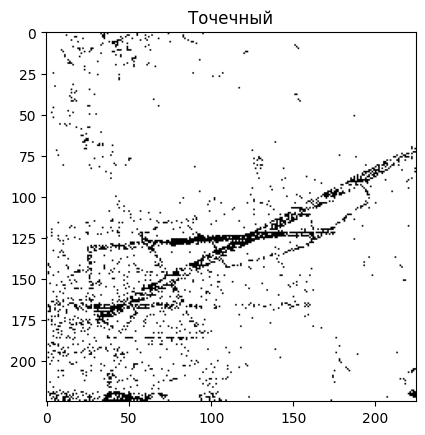

In [9]:
bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255
plt.imshow(bin_img, cmap="gray")
plt.title("Точечный")
plt.show()

### Бинаризация Отсу

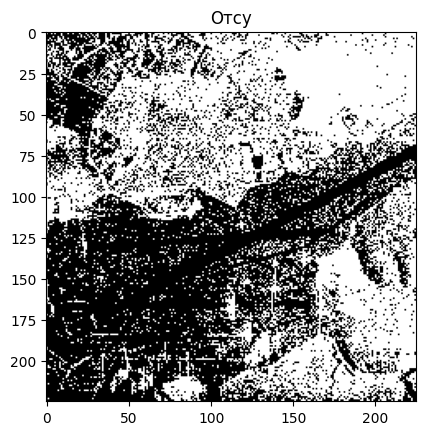

In [10]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")
plt.title("Отсу")
plt.show()

### Адаптивная бинаризация

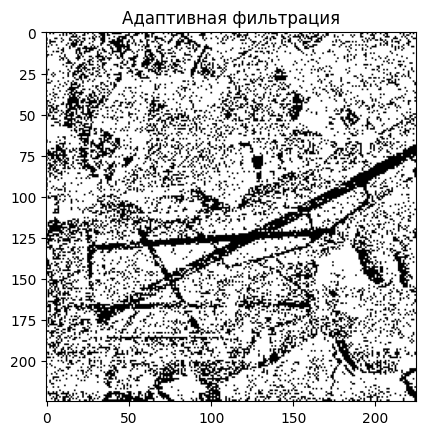

In [11]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,71,21)
plt.imshow(th3, cmap="gray")
plt.title("Адаптивная фильтрация")
plt.show()

### Оператор Собеля

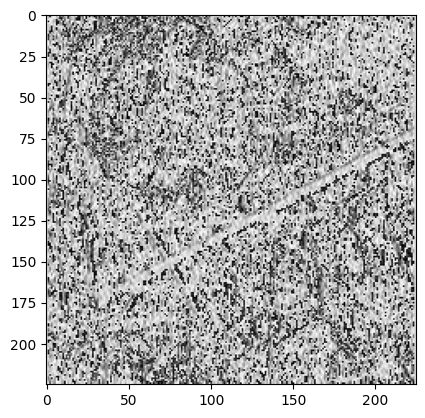

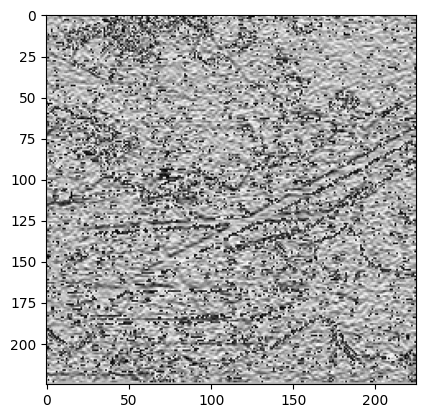

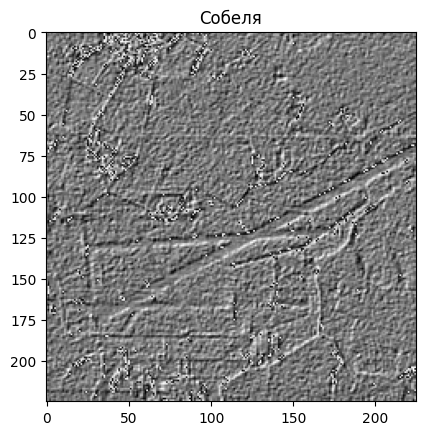

In [12]:
scale = 0.5
delta = 0.1
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")
plt.show()

plt.imshow((grad_y - grad_y.min())*255, cmap="gray")
plt.show()

grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)
plt.imshow((grad - grad.min())*255, cmap="gray")
plt.title("Собеля")
plt.show()

### Canny

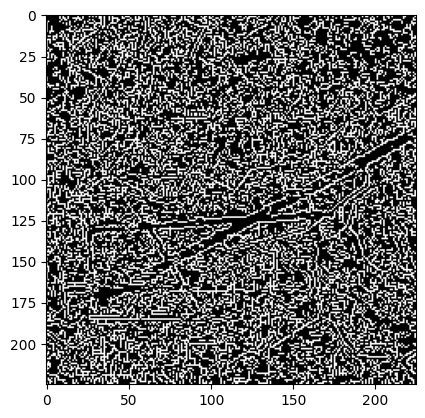

In [13]:
edges = cv2.Canny(image_gray,100,200)
plt.imshow(edges, cmap="gray")
plt.show()